# Статистика, занятие 9

Составитель: Ҳакимов Раҳматҷон. Email: rahmatjon@gmail.com. Telegram: https://t.me/rahmatjon_hakimov

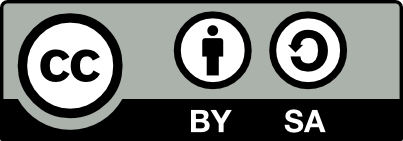

## Проверка гипотез

Проверка гипотез — это метод статистического анализа, который позволяет нам оценить предположения о популяционных параметрах на основе выборочных данных. 

P-value (уровень значимости) — это вероятность наблюдать результат, равный или более экстремальный, при условии, что нулевая гипотеза верна.

Вот типичный процесс проверки гипотезы на Python:

### Шаги:
1. **Формулировка гипотез:**
   - **Нулевая гипотеза ($H_0$)**: Нет значимого различия или эффект отсутствует.
   - **Альтернативная гипотеза ($H_1$)**: Есть значимое различие или эффект присутствует.
   
2. **Выбор статистического теста**: Например, двухвыборочный t-тест, если мы сравниваем средние значения двух выборок.

3. **Рассчет p-value**: Используем соответствующий тест для вычисления p-value.

4. **Принятие решения**:
   - Если p-value меньше уровня значимости (обычно 0.05), отвергаем $H_0$.
   - Если p-value больше, не отвергаем $H_0$.


## Двухвыборочный t-тест

### Пример на Python:
Предположим, что у нас есть две выборки, и мы хотим проверить, отличаются ли их средние значения.

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

t-статистика: -3.9953431435565956
p-value: 9.106540086305264e-05
Отклоняем нулевую гипотезу: средние различаются


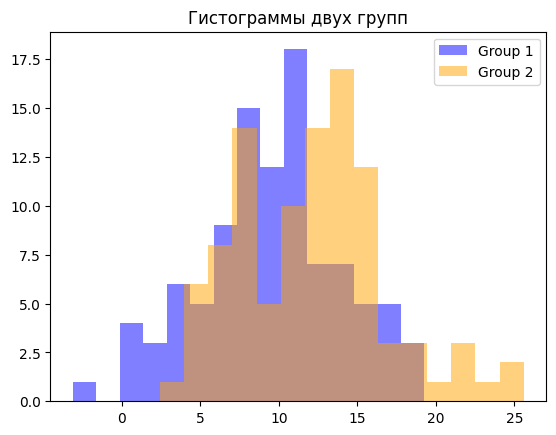

In [5]:
# Генерация данных
np.random.seed(42)
group1 = np.random.normal(10, 5, 100)
group2 = np.random.normal(12, 5, 100)

# t-тест
t_stat, p_value = stats.ttest_ind(group1, group2)

# Вывод результатов
print(f"t-статистика: {t_stat}")
print(f"p-value: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: средние различаются")
else:
    print("Не удалось отклонить нулевую гипотезу: средние не различаются")

# Гистограммы
plt.hist(group1, alpha=0.5, label='Group 1', bins=15, color='blue')
plt.hist(group2, alpha=0.5, label='Group 2', bins=15, color='orange')
plt.legend(loc='upper right')
plt.title('Гистограммы двух групп')
plt.show()

### Объяснение кода:
1. Мы создаём два массива случайных данных (`group1` и `group2`), взятых из нормальных распределений с различными средними значениями.
2. Используем t-тест для независимых выборок, чтобы проверить, есть ли статистически значимые различия между средними значениями двух групп.
3. На основе p-value мы принимаем или отклоняем нулевую гипотезу. Если p-value меньше 0.05, это означает, что различия статистически значимы.
4. Наконец, мы строим гистограммы для визуального представления данных.

## Одновыборочный t-тест

Одновыборочный t-тест используется для проверки гипотезы о том, отличается ли среднее значение выборки от некоторого известного значения (например, теоретического среднего).

### Пример проверки гипотезы с использованием одновыборочного t-теста:

#### Шаги:
1. **Формулировка гипотез:**
   - **Нулевая гипотеза ($H_0$)**: Среднее значение выборки равно теоретическому значению.
   - **Альтернативная гипотеза ($H_1$)**: Среднее значение выборки отличается от теоретического значения.

2. **Рассчет t-статистики и p-value**.

3. **Принятие решения**: 
   - Если p-value меньше уровня значимости (например, 0.05), нулевая гипотеза отвергается.


### Пример кода на Python:
Предположим, что у нас есть набор данных, и мы хотим проверить, отличается ли его среднее значение от 10.

t-статистика: 6.197310233600622
p-value: 1.3240962620220401e-08
Отвергаем нулевую гипотезу (среднее отличается от 10)


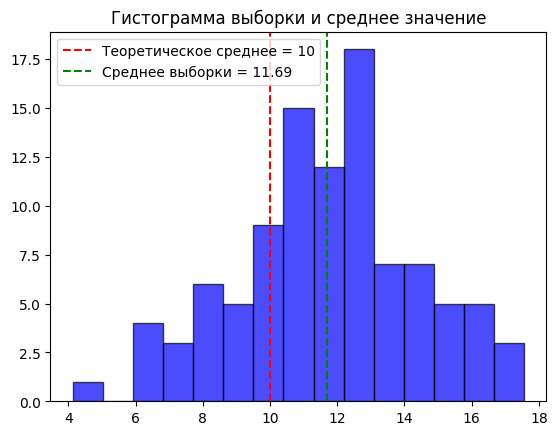

In [7]:
# Генерация случайной выборки
np.random.seed(42)
sample = np.random.normal(12, 3, 100)  # среднее значение = 12, стандартное отклонение = 3, размер выборки = 100

# Одновыборочный t-тест
t_stat, p_value = stats.ttest_1samp(sample, 10)

# Вывод результатов
print(f"t-статистика: {t_stat}")
print(f"p-value: {p_value}")

# Проверка гипотезы на уровне значимости 0.05
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу (среднее отличается от 10)")
else:
    print("Не можем отвергнуть нулевую гипотезу (среднее не отличается от 10)")

# Построение гистограммы выборки
plt.hist(sample, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='Теоретическое среднее = 10')
plt.axvline(x=np.mean(sample), color='green', linestyle='--', label=f'Среднее выборки = {np.mean(sample):.2f}')
plt.title('Гистограмма выборки и среднее значение')
plt.legend()
plt.show()

### Объяснение кода:
1. Мы создаём случайную выборку `sample` с нормальным распределением (среднее = 12, стандартное отклонение = 3).
2. Выполняем одновыборочный t-тест с гипотезой, что среднее значение выборки равно 10.
3. Если p-value меньше 0.05, нулевая гипотеза отвергается (значит, среднее отличается от 10).
4. На гистограмме отображаются:
   - Выборка.
   - Красная линия указывает теоретическое среднее (10).
   - Зелёная линия указывает среднее значение выборки.

## z-тест для сравнения средних значений

Процедура z-теста используется для проверки гипотезы о равенстве средних значений двух групп, когда известна дисперсия или когда размер выборки достаточно большой (обычно >30), что делает распределение выборочных средних приближающимся к нормальному.

### Шаги:
1. **Формулировка гипотез:**
   - **Нулевая гипотеза ($H_0$):** Средние значения двух групп одинаковы.
   - **Альтернативная гипотеза ($H_1$):** Средние значения двух групп различаются.

2. **Рассчет z-статистики**:
   $$ z = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$
   где:
   - $\overline{X_1}$ и $\overline{X_2}$ — средние значения выборок,
   - $\sigma_1^2$ и $\sigma_2^2$ — известные дисперсии,
   - $n_1$ и $n_2$ — размеры выборок.

3. **Рассчет p-value** и принятие решения:
   - Если p-value меньше уровня значимости (например, 0.05), отвергаем нулевую гипотезу.

### Пример реализации z-теста на Python:

Предположим, что у нас есть две группы с известными дисперсиями, и мы хотим проверить, есть ли значимые различия между их средними.

In [11]:
# Данные для двух групп
mean1 = 10   # Среднее значение первой группы
mean2 = 12   # Среднее значение второй группы
std1 = 3     # Стандартное отклонение первой группы (дисперсия известна)
std2 = 4     # Стандартное отклонение второй группы (дисперсия известна)
n1 = 50      # Размер выборки первой группы
n2 = 60      # Размер выборки второй группы

# Рассчет z-статистики
z_stat = (mean1 - mean2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))

# Рассчет p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Вывод результатов
print(f"z-статистика: {z_stat}")
print(f"p-value: {p_value}")

# Проверка гипотезы на уровне значимости 0.05
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу (средние значения различаются)")
else:
    print("Не можем отвергнуть нулевую гипотезу (средние значения не различаются)")

z-статистика: -2.992528008322899
p-value: 0.0027667727821700794
Отвергаем нулевую гипотезу (средние значения различаются)
